In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [50]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [51]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

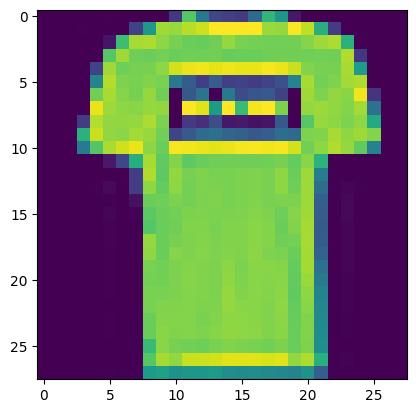

In [52]:
print(X_train.shape)

_, axe = plt.subplots()

axe.imshow(X_train[1])

print(X_train[1])

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8246 - accuracy: 0.6434
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7067 - accuracy: 0.7182
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5781 - accuracy: 0.7862
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.8220
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.8393
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4230 - accuracy: 0.8490
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4068 - accuracy: 0.8541
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8616
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8637
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.364

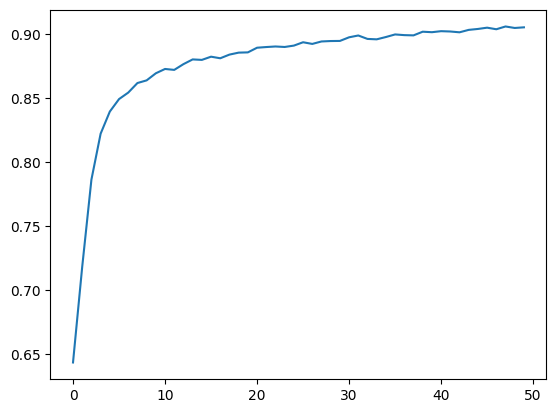

In [53]:
# input_shape
# hidden layer : InputLayer와 마지막 Layer를 제외한 layer
# 2개의 Dense hidden layers
# units= 각 128개, 64개
# activation = relu
# compile - loss : SparseCategoricalCrossentropy(from_logits=True)
# optimizer = adam, learning_rate=0.1 
# epochs = 50


model = keras.Sequential([
  keras.layers.InputLayer(input_shape=[28,28]),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10)  # target의 개수
])

# model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), 
#               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # 분류기는 accuracy를 확인

h = model.fit(X_train, y_train, epochs=50)

_, axe = plt.subplots()

axe.plot(h.history['accuracy'])

In [63]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 801us/step - loss: 0.5167 - accuracy: 0.8634


[0.5167216062545776, 0.8633999824523926]

In [65]:
print(model.summary())
model.weights

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 128)               100480    
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


[<tf.Variable 'dense_41/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.02373838, -0.17677537, -0.01713753, ..., -0.06401636,
         -0.05319634, -0.07689264],
        [ 0.09107243,  0.01052787,  0.01946508, ...,  0.43787318,
         -0.06195756, -0.01126191],
        [-0.05924572, -0.91944355,  0.09170228, ..., -0.02009415,
          0.02550979,  0.09956351],
        ...,
        [-0.02767863, -0.3547583 , -0.00785742, ...,  0.18528211,
          0.01816376,  0.06278691],
        [ 0.21124205, -0.6965879 , -0.02327958, ...,  0.14591524,
         -0.04292872, -0.05355907],
        [ 0.06731609, -1.0559366 ,  0.05422822, ...,  0.28079268,
          0.01767604,  0.05979875]], dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 1.64848506e-01, -1.01525009e+00,  2.29531946e-03, -6.64279833e-02,
         3.46637696e-01, -1.69600584e-02,  1.87860465e+00, -2.85300091e-02,
        -8.75221286e-03,  8.38080645e-01, -1.54068144e-02, -1.853